In [1]:
#packages needed for webscraping
from operator import imod
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#Creating the requests to get to information from the websites

url = "https://www.liberatedstocktrader.com/sp-500-companies-list-by-number-of-employees/"
url3 = "https://stockmarketmba.com/stocksinthesp500.php"

r = requests.get(url).content
r2 = requests.get(url3).content

In [3]:
#creating the dataframes from the tables found in the websites

df = pd.read_html(r)[1]
df2 = pd.read_html(r2)[0]

In [4]:
#Making the first row the header of the first dataframe
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

#Changing the name of one column of the second dataframe in order to have the same name as the 
#first dataframe, and merge them
df2 = df2.rename(columns={'Symbol': 'Ticker'})

In [5]:
#merging the two dataframes
temp_df = pd.merge(df, df2, on = "Ticker")


In [6]:
#Dropping unnecesary columns
sp500 = temp_df.drop(['Description', 'Category2', 'Category3', 'GICS Sector', 'Action', 'Price to book value', 'Price to TTM sales'], axis=1)

In [7]:
#Renaming columns for easy reading
sp500 = sp500.rename(columns={'Company_x': 'Company', 'Sector_x': 'Sector', 'Price to TTM earnings': 'PE Ratio'})

In [8]:
#Exporting final dataframe as a csv dataset
sp500.to_csv('s&p500.csv')

In [9]:
sp500

,Ticker,Company,Sector,# Employees,Market cap,Dividend yield,PE Ratio
0,WMT,Walmart Inc.,Retail Trade,2300000,"$416,282,672,398",1.45%,0.0
1,AMZN,"Amazon.com, Inc.",Retail Trade,1298000,"$974,257,973,808",0.00%,0.0
2,ACN,Accenture plc,Technology Services,624000,"$201,316,285,554",1.32%,0.0
3,UPS,"United Parcel Service, Inc.",Transportation,543000,"$164,498,784,470",3.13%,0.0
4,HD,"Home Depot, Inc. (The)",Retail Trade,504800,"$334,830,207,712",2.30%,0.0
...,...,...,...,...,...,...,...
471,FRT,Federal Realty Investment Trust,Finance,307,"$8,853,457,401",2.93%,0.0
472,PEAK,"Healthpeak Properties, Inc.",Finance,217,"$14,056,674,766",4.51%,0.0
473,O,Realty Income Corporation,Finance,210,"$39,391,534,009",4.63%,0.0
474,HST,Host Hotels,Finance,163,"$13,363,868,853",1.12%,0.0


In [10]:
sp500['# Employees'] = pd.to_numeric(sp500['# Employees'])/1000

sp500['Market cap'] = sp500['Market cap'].str.replace(',','', regex=True)

sp500['Market cap'] = sp500['Market cap'].str.replace('$','', regex=True)

sp500['Market cap'] = pd.to_numeric(sp500['Market cap'])/1000000

sp500['Market cap'] = sp500['Market cap'].round(decimals=2)

sp500['Dividend yield'] = sp500['Dividend yield'].str.replace('%','', regex=True)

sp500['Dividend yield'] = pd.to_numeric(sp500['Dividend yield'])

In [11]:
sp500.head(10)

,Ticker,Company,Sector,# Employees,Market cap,Dividend yield,PE Ratio
0,WMT,Walmart Inc.,Retail Trade,2300.0,416282.67,1.45,0.0
1,AMZN,"Amazon.com, Inc.",Retail Trade,1298.0,974257.97,0.00,0.0
2,ACN,Accenture plc,Technology Services,624.0,201316.29,1.32,0.0
3,UPS,"United Parcel Service, Inc.",Transportation,543.0,164498.78,3.13,0.0
4,HD,"Home Depot, Inc. (The)",Retail Trade,504.8,334830.21,2.30,0.0
5,KR,Kroger Company (The),Retail Trade,465.0,34652.18,1.93,0.0
6,TGT,Target Corporation,Retail Trade,409.0,75957.14,2.37,0.0
7,SBUX,Starbucks Corporation,Consumer Services,383.0,118648.09,1.91,0.0
8,IBM,International Business Machines Corporation,Technology Services,375.3,134859.49,4.34,0.0
9,BRK.B,Berkshire Hathaway Inc. New,Finance,360.0,695954.53,0.00,0.0


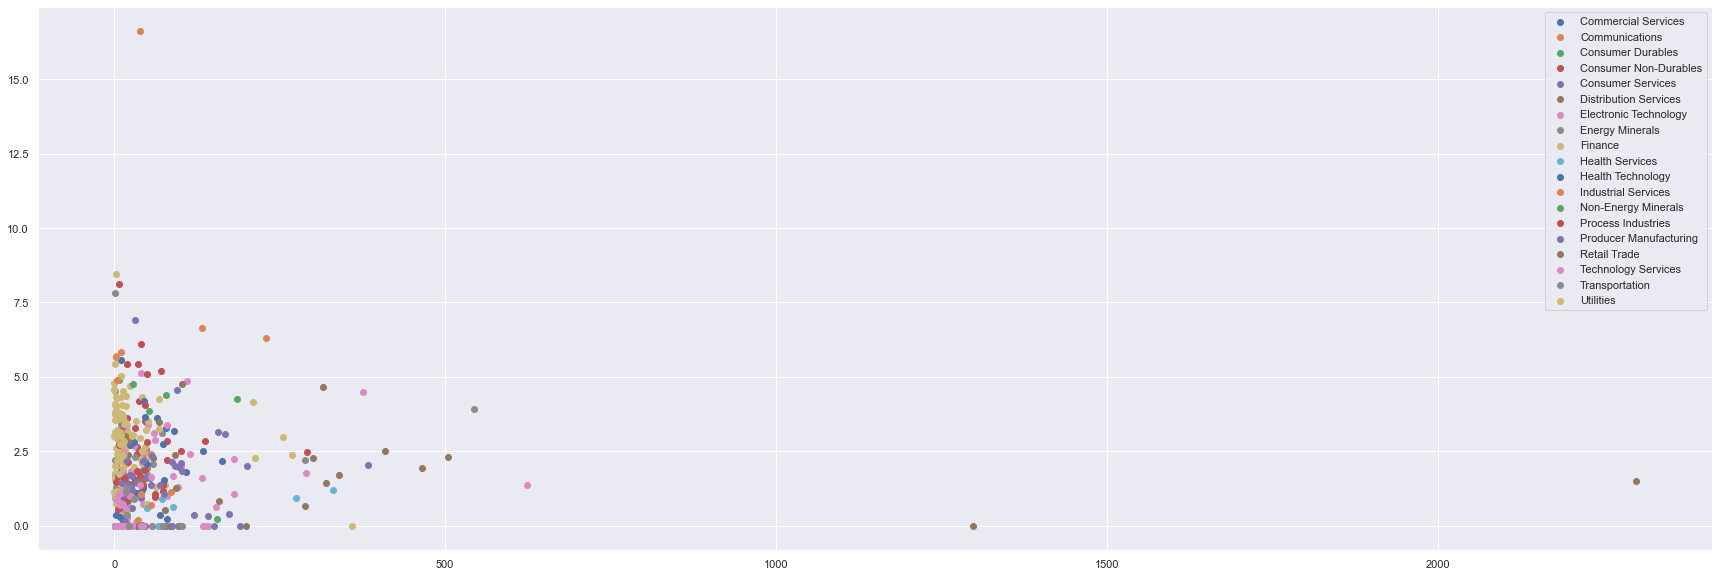

In [153]:

groups = sp500.groupby('Sector')

plt.figure(figsize=(30,10))

for name, group in groups:
    plt.scatter(group['# Employees'], group['Dividend yield'], label=name)

plt.legend()

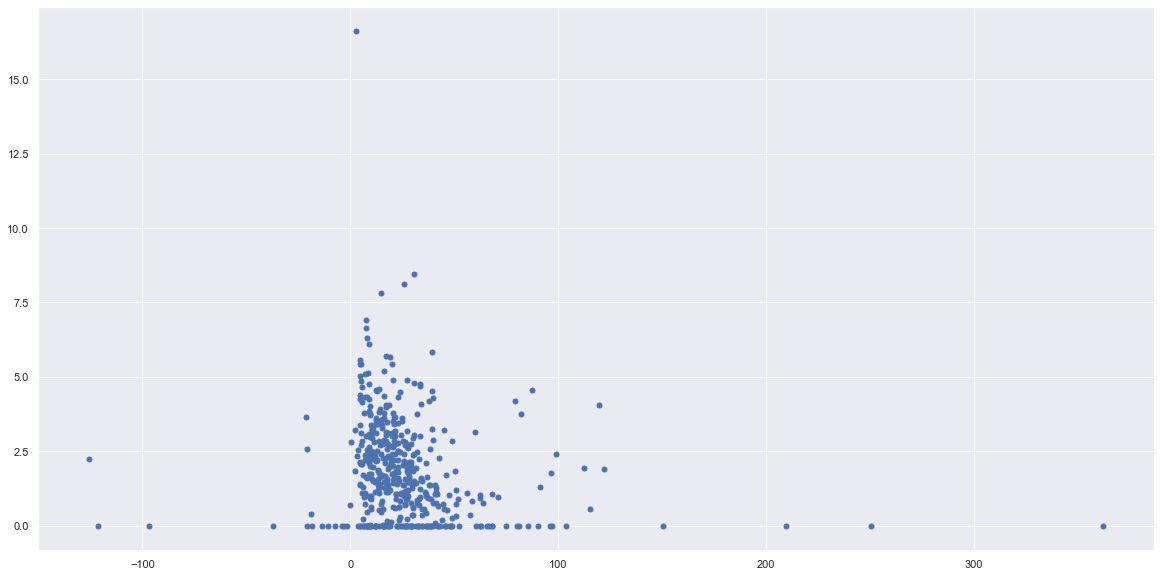

In [157]:
plt.figure(figsize=(20,10))

plt.plot(sp500['PE Ratio'], sp500['Dividend yield'], marker='o', linestyle='', markersize=5)

[Text(0, 0, 'Retail Trade'),
 Text(1, 0, 'Technology Services'),
 Text(2, 0, 'Transportation'),
 Text(3, 0, 'Consumer Services'),
 Text(4, 0, 'Finance'),
 Text(5, 0, 'Health Services'),
 Text(6, 0, 'Consumer Non-Durables'),
 Text(7, 0, 'Communications'),
 Text(8, 0, 'Consumer Durables'),
 Text(9, 0, 'Electronic Technology'),
 Text(10, 0, 'Producer Manufacturing'),
 Text(11, 0, 'Commercial Services'),
 Text(12, 0, 'Health Technology'),
 Text(13, 0, 'Industrial Services'),
 Text(14, 0, 'Distribution Services'),
 Text(15, 0, 'Process Industries'),
 Text(16, 0, 'Energy Minerals'),
 Text(17, 0, 'Utilities'),
 Text(18, 0, 'Non-Energy Minerals')]

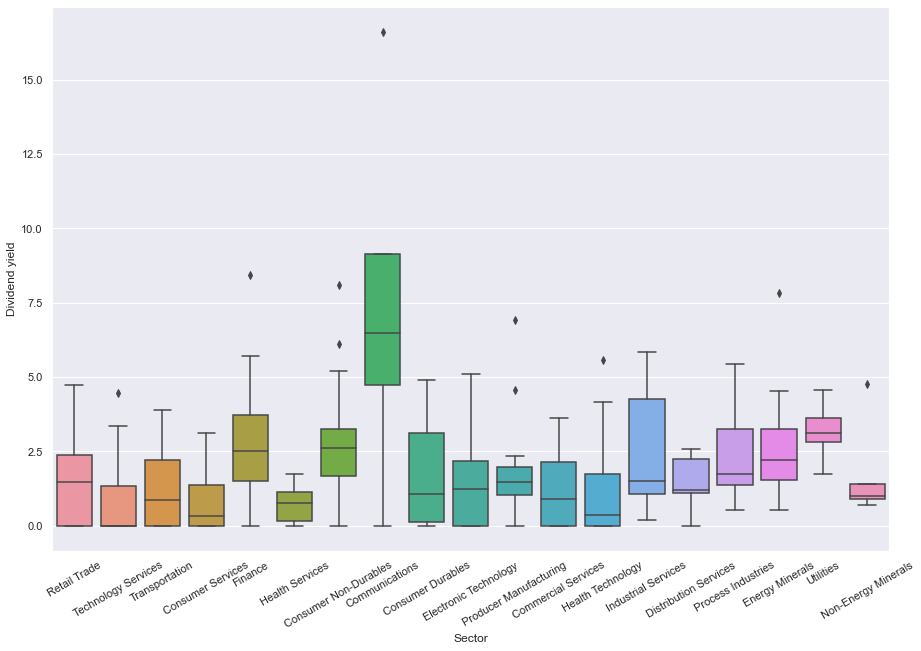

In [126]:
sns.set(rc={"figure.figsize":(15, 10)})

ax = sns.boxplot(x = sp500['Sector'],
            y = sp500['Dividend yield'])

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Retail Trade'),
 Text(1, 0, 'Technology Services'),
 Text(2, 0, 'Transportation'),
 Text(3, 0, 'Consumer Services'),
 Text(4, 0, 'Finance'),
 Text(5, 0, 'Health Services'),
 Text(6, 0, 'Consumer Non-Durables'),
 Text(7, 0, 'Communications'),
 Text(8, 0, 'Consumer Durables'),
 Text(9, 0, 'Electronic Technology'),
 Text(10, 0, 'Producer Manufacturing'),
 Text(11, 0, 'Commercial Services'),
 Text(12, 0, 'Health Technology'),
 Text(13, 0, 'Industrial Services'),
 Text(14, 0, 'Distribution Services'),
 Text(15, 0, 'Process Industries'),
 Text(16, 0, 'Energy Minerals'),
 Text(17, 0, 'Utilities'),
 Text(18, 0, 'Non-Energy Minerals')]

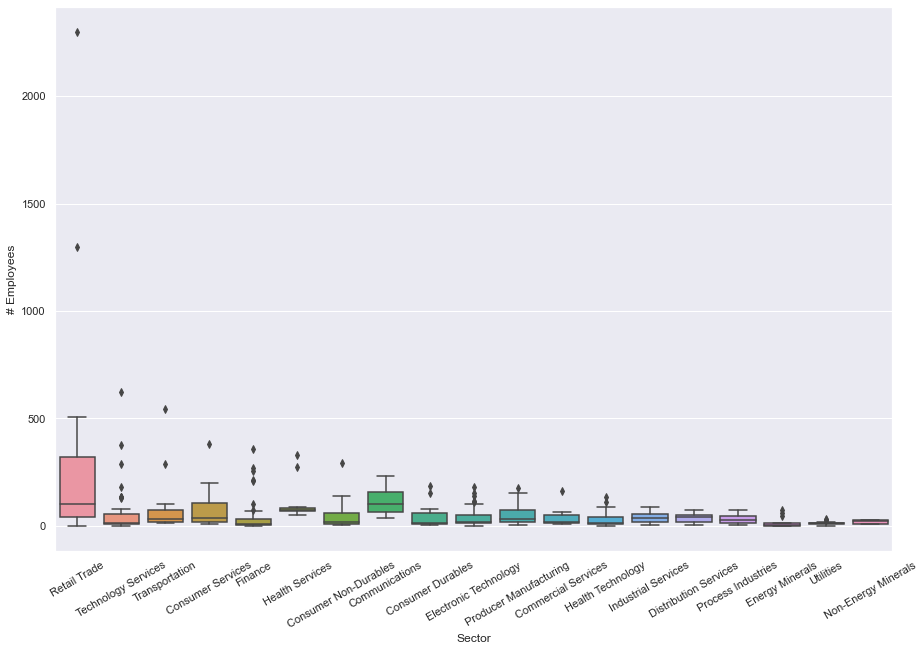

In [19]:
sns.set(rc={"figure.figsize":(15, 10)})

ax = sns.boxplot(x = sp500['Sector'],
            y = sp500['# Employees'])

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 576x360 with 0 Axes>

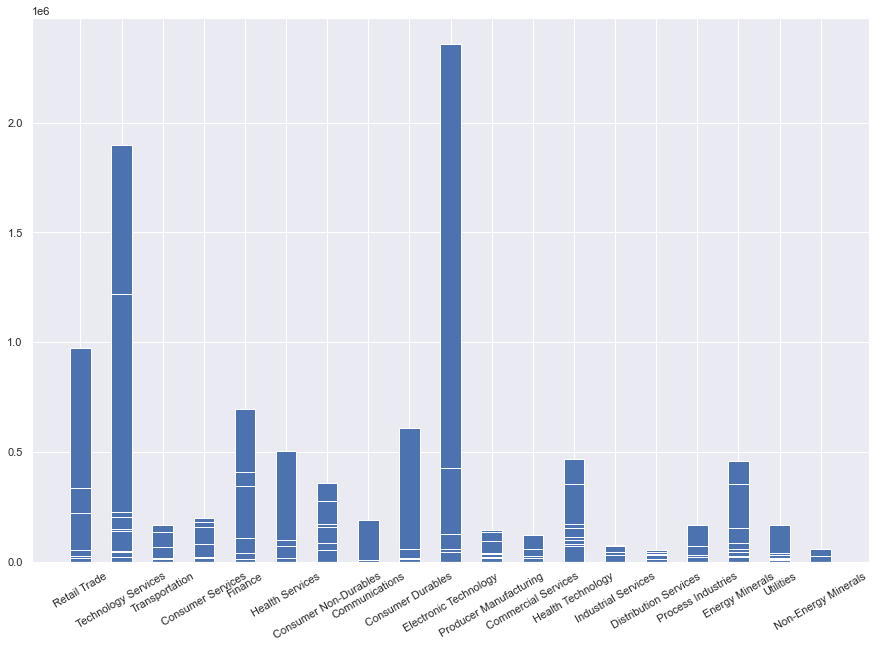

In [20]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()

ax.bar(sp500.Sector, sp500['Market cap'], width = 0.5)

plt.xticks(rotation=30)

In [12]:
sp500['div_type'] = [{d<3: 'Under 3%', 3<=d<=7: 'Between 3% & 7%', d>7: 'Over 7%'}[True] for d in sp500['Dividend yield']]

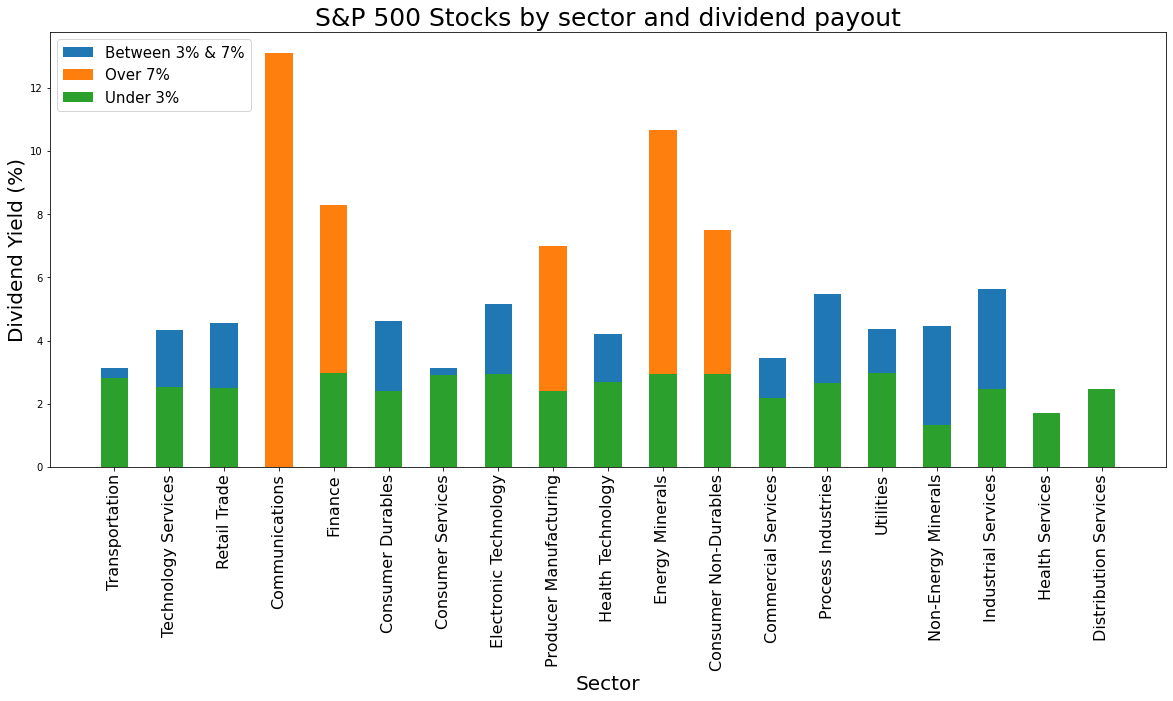

In [27]:
groups = sp500.groupby('div_type')

plt.figure(figsize=(20,8))

for name, group in groups:
    plt.bar(group.Sector, group['Dividend yield'], width = 0.5, label=name)

plt.xticks(rotation=90, size = 16)
plt.title('S&P 500 Stocks by sector and dividend payout', size = 25)
plt.ylabel('Dividend Yield (%)', size = 20)
plt.xlabel('Sector', size = 20)
plt.legend(loc = 2, fontsize = 15)